In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import scipy
import math
import pydotplus
import graphviz
import warnings

from sklearn import ensemble, neighbors, tree, linear_model, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings("ignore", category=FutureWarning)

In [76]:
sns.set_style('white')
train = pd.read_csv('C://duh/Thinkful/Thinkful/CapstoneResearch/GeneratedAgents.csv')
predict = pd.read_csv('C://duh/Thinkful/Thinkful/CapstoneResearch/GeneratedAgentsPredict.csv')

# Setting Up Variables and PCA Exploration

In [77]:
train_X = train.drop(['is_current_threat', 'prob_threat'], 1)
train_Y_cat = train['is_current_threat']
train_Y_cont = train['prob_threat']

predict_X = predict.drop(['is_current_threat', 'prob_threat'], 1)

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
predict_X = scaler.transform(predict_X)

pca = PCA(.95)
pca.fit(train_X)
train_X = pca.transform(train_X)
predict_X = pca.transform(predict_X)

train_cat_X, test_cat_X, train_cat_Y, test_cat_Y = train_test_split(
    train_X, train_Y_cat, test_size=0.2, random_state=0)
train_cont_X, test_cont_X, train_cont_Y, test_cont_Y = train_test_split(
    train_X, train_Y_cont, test_size=0.2, random_state=0)

c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


# Naive Bayes

In [4]:
bnb = BernoulliNB()

print('With 20% Holdout: ' + str(bnb.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(bnb.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n',cross_val_score(bnb, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9725
R^2 Score: 0.9664
Cross Validation:
 [0.96603397 0.96603397 0.96603397 0.96603397 0.966      0.966
 0.96696697 0.96696697 0.96696697 0.96696697]


# Linear Regression

In [5]:
lin_regr = linear_model.LinearRegression()

print('With 20% Holdout: ' + str(lin_regr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 score:', lin_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont))
print('Cross Validation:\n', cross_val_score(lin_regr, train_X, train_Y_cont, cv=10))

With 20% Holdout: 0.004340060955738356
R^2 score: 0.01983666325152511
Cross Validation:
 [0.02641851 0.01614931 0.00450195 0.01829921 0.0081354  0.01498437
 0.00360787 0.02882888 0.02555651 0.01991088]


# K-Nearest Neighbor Classifier; k=5, weighted

In [89]:
knn_class = neighbors.KNeighborsClassifier(n_neighbors=35, weights='distance')

print('With 20% Holdout: ' + str(knn_class.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(knn_class.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(knn_class, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9745
R^2 Score: 1.0
Cross Validation:
 [0.96703297 0.96903097 0.96803197 0.96703297 0.97       0.967
 0.96996997 0.96896897 0.96796797 0.96796797]


# K-Nearest Neighbor Regression, k=5 weighted

In [88]:
knn_regr = neighbors.KNeighborsRegressor(n_neighbors=35, weights='distance')

print('With 20% Holdout: ' + str(knn_regr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(knn_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(knn_regr, train_X, train_Y_cont, cv=10))

With 20% Holdout: 0.004190963578392659
R^2 Score: 1.0
Cross Validation:
 [ 0.02914123  0.03541451 -0.01391386  0.00472022  0.00940448  0.01331874
 -0.0094041   0.01820336  0.02321753  0.0282279 ]


# Decision Tree Classifier, max_features=3, max_depth=5

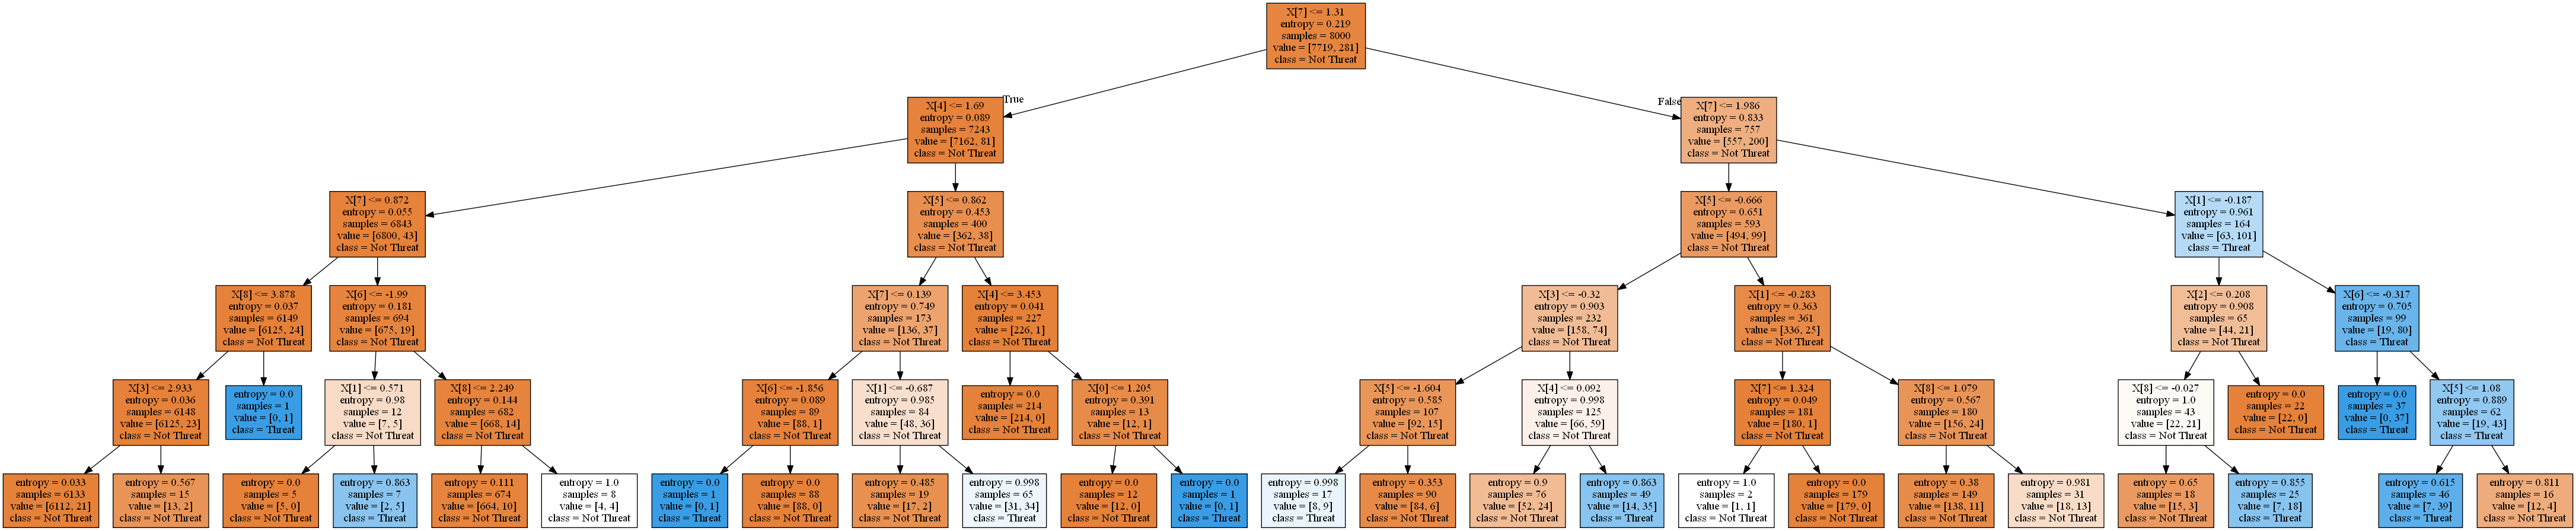

In [8]:
class_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5
)

class_tree.fit(train_cat_X, train_cat_Y)

dot_data = tree.export_graphviz(
    class_tree, out_file=None,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
print('With 20% Holdout: ' + str(class_tree.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(class_tree.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(class_tree, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9745
R^2 Score: 0.9773
Cross Validation:
 [0.96903097 0.97102897 0.96803197 0.97402597 0.969      0.965
 0.97097097 0.97297297 0.97397397 0.97297297]


# Decision Tree Regression, max_depth=5

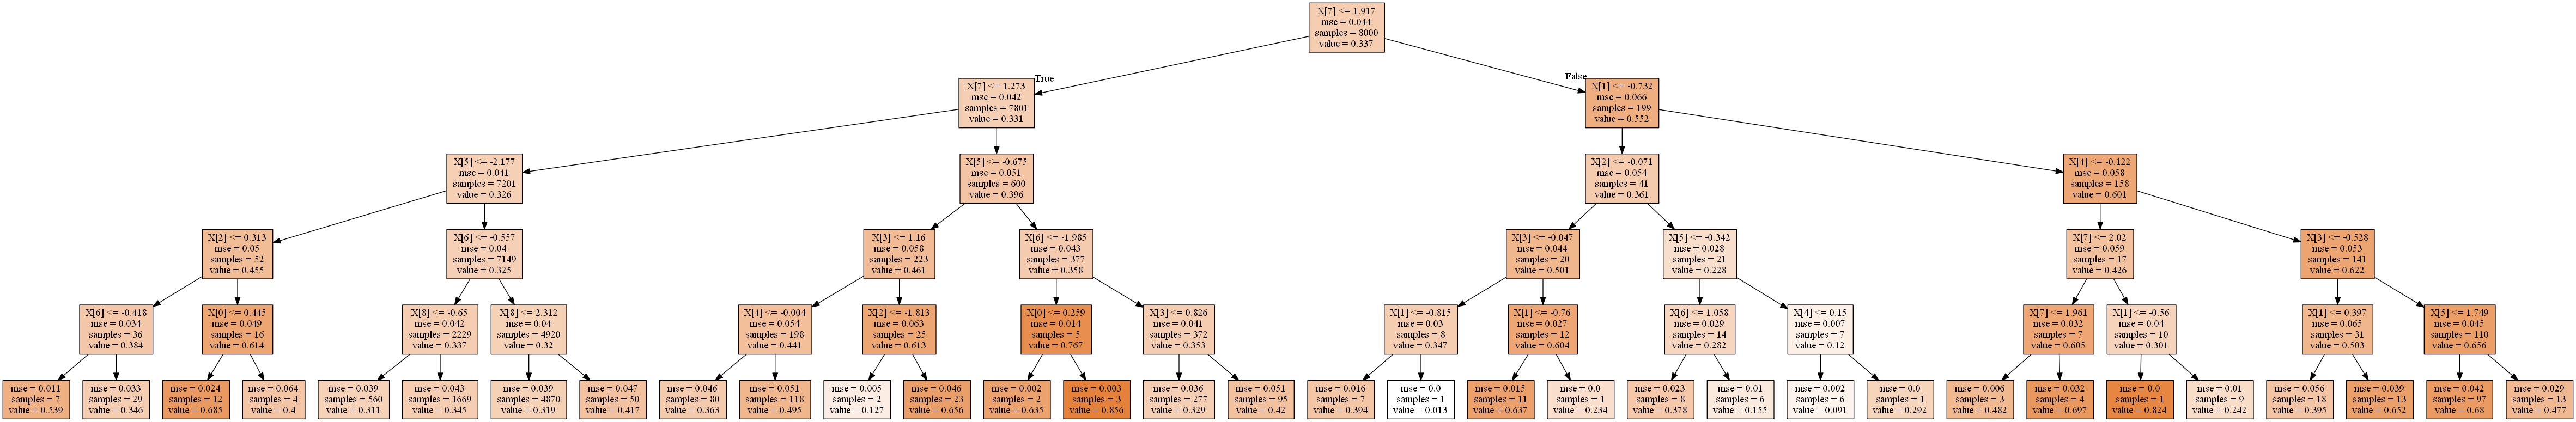

In [10]:
regr_tree = tree.DecisionTreeRegressor(max_depth=5)
regr_tree.fit(train_cont_X, train_cont_Y)

dot_data = tree.export_graphviz(
    regr_tree, out_file=None,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
print('With 20% Holdout: ' + str(regr_tree.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2:\n', regr_tree.fit(train_X, train_Y_cont).score(train_X, train_Y_cont))
print('Cross Validation:\n', cross_val_score(regr_tree, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.012615330904671929
R^2:
 0.06841449111948628
Cross Validation:
 [ 0.03280013  0.03022861 -0.01213179 -0.01494949 -0.01031002  0.03911568
 -0.01100791  0.02888288  0.01778352  0.02288586]


# Random Forest Classifier

In [12]:
rfc = ensemble.RandomForestClassifier()

print('With 20% Holdout: ' + str(rfc.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(rfc.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(rfc, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9785
R^2 Score: 0.998
Cross Validation:
 [0.97402597 0.97502498 0.97802198 0.97502498 0.975      0.972
 0.97897898 0.97697698 0.97697698 0.97797798]


# Random Forest Regression

In [13]:
rfg = ensemble.RandomForestRegressor()

print('With 20% Holdout: ' + str(rfg.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(rfg.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(rfg, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.12630673764894307
R^2 Score: 0.8080991702196697
Cross Validation:
 [-0.04945703 -0.03654852 -0.15371181 -0.12095437 -0.12233656 -0.03711283
 -0.12327259 -0.05951968 -0.08951786 -0.08339638]


# Logistic Regression

In [14]:
lr = LogisticRegression(C=1e9)

print('With 20% Holdout: ' + str(lr.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score:\n', lr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat))
print('Cross Validation:\n', cross_val_score(lr, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9855
R^2 Score:
 0.98
Cross Validation:
 [0.98001998 0.97802198 0.98301698 0.97802198 0.98       0.977
 0.97797798 0.98198198 0.98098098 0.97997998]


# Ridge Regression, alpha=10

In [15]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)

print('With 20% Holdout: ' + str(ridgeregr.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score:\n', ridgeregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat))
print('Cross Validation:\n', cross_val_score(ridgeregr, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.08082445278182226
R^2 Score:
 0.11893242537351123
Cross Validation:
 [0.10219741 0.13988526 0.09985125 0.04123776 0.15214011 0.14047927
 0.07800896 0.08635172 0.13560953 0.11373837]


# Lasso Regression, alpha=.35

In [16]:
lassoregr = linear_model.Lasso(alpha=.35)

print('With 20% Holdout: ' + str(lassoregr.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score:\n', lassoregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat))
print('Cross Validation:\n', cross_val_score(lassoregr, train_X, train_Y_cat, cv=10))

With 20% Holdout: -0.0021739892498244817
R^2 Score:
 0.0
Cross Validation:
 [-4.00538995e-04 -5.60224090e-03 -9.27712518e-04 -9.53353762e-03
 -4.00538995e-04 -2.04907535e-04 -2.04703962e-03 -2.77828124e-04
 -4.00538995e-04 -1.39276251e-05]


# Support Vector Classifier, kernal=linear

In [17]:
svm = SVC(kernel = 'linear')

print('With 20% Holdout: ' + str(svm.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(svm.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(svm, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.985
R^2 Score: 0.9806
Cross Validation:
 [0.98001998 0.97902098 0.98001998 0.97902098 0.981      0.978
 0.98098098 0.98198198 0.98298298 0.98198198]


# Support Vector Regression, gamma=auto

In [18]:
svr = SVR(gamma='auto')

print('With 20% Holdout: ' + str(svr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(svr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(svr, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.04185770623817198
R^2 Score: 0.20094797943712395
Cross Validation:
 [ 0.00691461  0.0023425  -0.10042735 -0.05013188 -0.06325562  0.00088306
 -0.04749943  0.01310676 -0.01405303 -0.01563184]


# Boosted Classifier; loss=deviance, n_estimators=500, max_depth=5

In [19]:
params = {'loss': 'deviance', 'n_estimators':500, 'max_depth':10}

clf = ensemble.GradientBoostingClassifier(**params)

print('With 20% Holdout: ' + str(clf.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(clf.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(clf, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.98
R^2 Score: 1.0
Cross Validation:
 [0.97502498 0.97802198 0.98101898 0.97902098 0.978      0.968
 0.97897898 0.97697698 0.97297297 0.97697698]


# Boosted Regression; loss=ls, learning_rate=.1, n_estimators=500, max_depth=10

In [87]:
params = {'loss': 'ls', 'learning_rate': .05, 'n_estimators': 500, 'max_depth': 10}

regr = ensemble.GradientBoostingRegressor(**params)

print('With 20% Holdout: ' + str(regr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(regr, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.11298317707761198
R^2 Score: 0.8883814801737545
Cross Validation:
 [-0.03291828 -0.0166244  -0.13807665 -0.0756923  -0.08468795 -0.03646943
 -0.09629167 -0.02523544 -0.03747469 -0.06448312]


In [78]:
predict['prob_threat'] = regr.predict(predict_X)

[]

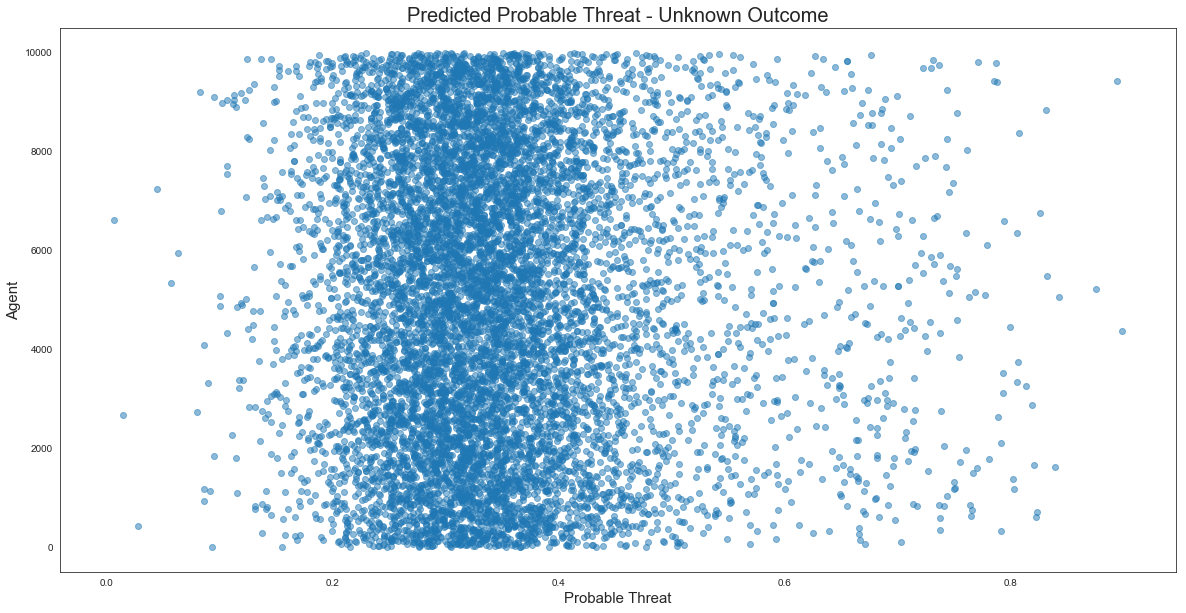

In [79]:
plt.figure(figsize=(20,10))
plt.scatter(predict['prob_threat'], predict.index, alpha=.5)
plt.title('Predicted Probable Threat - Unknown Outcome', size=20)
plt.xlabel('Probable Threat', size=15)
plt.ylabel('Agent', size=15)
plt.plot()

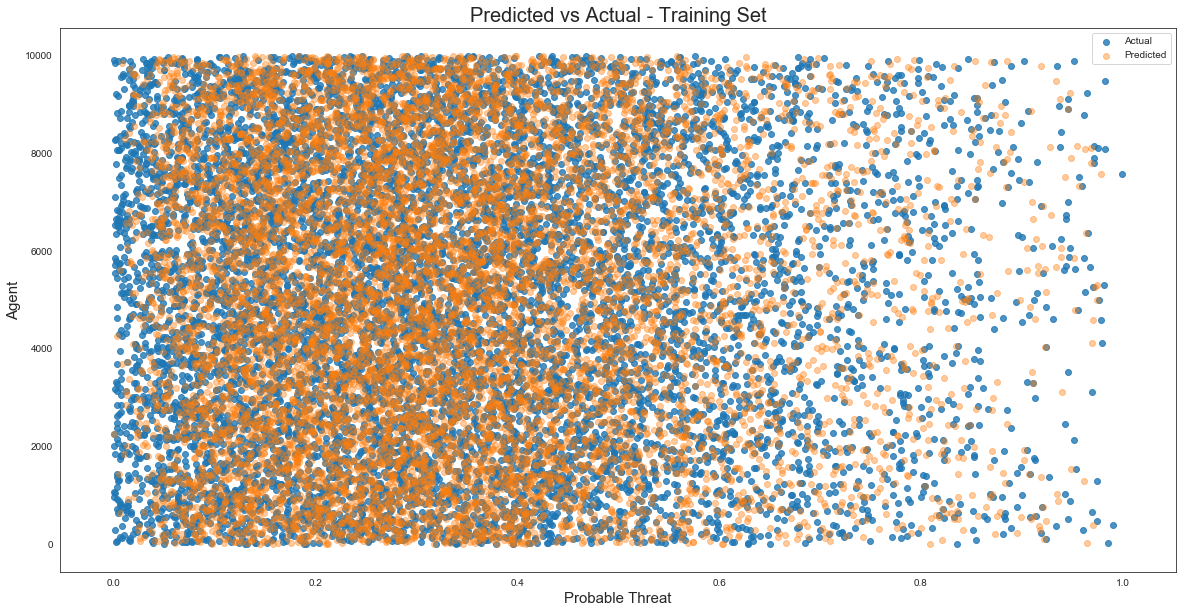

In [83]:
plt.figure(figsize=(20,10))
plt.scatter(train['prob_threat'], train.index, alpha = .8, label='Actual')
plt.scatter(regr.predict(train_X), train.index, alpha = .4, label='Predicted')
plt.title('Predicted vs Actual - Training Set', size=20)
plt.xlabel('Probable Threat', size=15)
plt.ylabel('Agent', size=15)
plt.legend()
plt.show()

In [61]:
print('Naive Bayes R^2 Score: ' + str(bnb.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Linear Regression R^2 score: ' + str(lin_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('K-Nearest Neighbors Classifer R^2 Score: ' + str(knn_class.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('K-Nearest Neighbors Regressor R^2 Score: ' + str(knn_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Decision Tree Classifier R^2 Score: ' + str(class_tree.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Decision Tree Regressor R^2 Score: ' + str(regr_tree.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Random Forest Classifier R^2 Score: ' + str(rfc.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Random Forest Regressor R^2 Score: ' + str(rfg.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Logistic Regression R^2 Score: ' + str(lr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Ridge Regression R^2 Score: ' + str(ridgeregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Lasso Regression R^2 Score: ' + str(lassoregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Support Vector Classifier R^2 Score: ' + str(svm.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Support Vectore Regressor R^2 Score: ' + str(svr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Boosted Classifier R^2 Score: ' + str(clf.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Boosted Regression R^2 Score: ' + str(regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))

Naive Bayes R^2 Score: 0.9664
Linear Regression R^2 score: 0.01983666325152511
K-Nearest Neighbors Classifer R^2 Score: 1.0
K-Nearest Neighbors Regressor R^2 Score: 1.0
Decision Tree Classifier R^2 Score: 0.9773
Decision Tree Regressor R^2 Score: 0.06841449111948628
Random Forest Classifier R^2 Score: 0.9979
Random Forest Regressor R^2 Score: 0.8053364405983604
Logistic Regression R^2 Score: 0.98
Ridge Regression R^2 Score: 0.11893242537351123
Lasso Regression R^2 Score: 0.0
Support Vector Classifier R^2 Score: 0.9806
Support Vectore Regressor R^2 Score: 0.20094797943712395
Boosted Classifier R^2 Score: 1.0
Boosted Regression R^2 Score: 0.9818900871918079


In [84]:
print('Linear Regression R^2 score: ' + str(lin_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('K-Nearest Neighbors Regressor R^2 Score: ' + str(knn_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Decision Tree Regressor R^2 Score: ' + str(regr_tree.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Random Forest Regressor R^2 Score: ' + str(rfg.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Ridge Regression R^2 Score: ' + str(ridgeregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Lasso Regression R^2 Score: ' + str(lassoregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Support Vectore Regressor R^2 Score: ' + str(svr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Boosted Regression R^2 Score: ' + str(regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))

Linear Regression R^2 score: 0.01983666325152511
K-Nearest Neighbors Regressor R^2 Score: 1.0
Decision Tree Regressor R^2 Score: 0.06841449111948628
Random Forest Regressor R^2 Score: 0.8085249928264229
Ridge Regression R^2 Score: 0.11893242537351123
Lasso Regression R^2 Score: 0.0
Support Vectore Regressor R^2 Score: 0.20094797943712395
Boosted Regression R^2 Score: 0.9818900871918079
